# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import timeit

from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_country = city_weather["sys"]["country"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        description = city_weather['weather'][0]['description']
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | haines junction
Processing Record 3 of Set 1 | glendive
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ejido
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | margate
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | caraquet
Processing Record 11 of Set 1 | umea
Processing Record 12 of Set 1 | alotau
City not found. Skipping...
Processing Record 13 of Set 1 | plettenberg bay
Processing Record 14 of Set 1 | isangel
Processing Record 15 of Set 1 | nizhniy tsasuchey
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | viligili
City not found. Skipping

Processing Record 36 of Set 4 | lebu
Processing Record 37 of Set 4 | mar del plata
Processing Record 38 of Set 4 | jian
Processing Record 39 of Set 4 | bluff
Processing Record 40 of Set 4 | tsentralnyy
City not found. Skipping...
Processing Record 41 of Set 4 | iisalmi
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | cunha
Processing Record 44 of Set 4 | sao felix do xingu
Processing Record 45 of Set 4 | kambove
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | yurimaguas
Processing Record 49 of Set 4 | ijaki
City not found. Skipping...
Processing Record 50 of Set 4 | port hardy
Processing Record 1 of Set 5 | esfarayen
Processing Record 2 of Set 5 | palmares do sul
Processing Record 3 of Set 5 | farafangana
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | pahrump
Processing Record 7 of Set 5 | imbituba
Proces

Processing Record 25 of Set 8 | jumla
Processing Record 26 of Set 8 | ciudad guayana
Processing Record 27 of Set 8 | nyurba
Processing Record 28 of Set 8 | couva
Processing Record 29 of Set 8 | phan thiet
Processing Record 30 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 31 of Set 8 | cowra
Processing Record 32 of Set 8 | sidi ali
Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | langenburg
Processing Record 35 of Set 8 | gaoua
Processing Record 36 of Set 8 | beira
Processing Record 37 of Set 8 | turayf
Processing Record 38 of Set 8 | vila franca do campo
Processing Record 39 of Set 8 | sharjah
Processing Record 40 of Set 8 | seoul
Processing Record 41 of Set 8 | sola
Processing Record 42 of Set 8 | vire
Processing Record 43 of Set 8 | beipiao
Processing Record 44 of Set 8 | glotovka
Processing Record 45 of Set 8 | katsuura
Processing Record 46 of Set 8 | duluth
Processing Record 47 of Set 8 | thunder bay
Processing Record 48 of Set 8 | lavren

Processing Record 15 of Set 12 | victoria
Processing Record 16 of Set 12 | kardla
Processing Record 17 of Set 12 | jiexiu
Processing Record 18 of Set 12 | saint leonard
Processing Record 19 of Set 12 | south river
Processing Record 20 of Set 12 | labuan
Processing Record 21 of Set 12 | smithers
Processing Record 22 of Set 12 | upata
Processing Record 23 of Set 12 | poopo
Processing Record 24 of Set 12 | rettikhovka
Processing Record 25 of Set 12 | saint george
Processing Record 26 of Set 12 | labuhan
Processing Record 27 of Set 12 | socorro
Processing Record 28 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 29 of Set 12 | gizo
Processing Record 30 of Set 12 | howard springs
Processing Record 31 of Set 12 | dogondoutchi
Processing Record 32 of Set 12 | yarmouth
Processing Record 33 of Set 12 | broken hill
Processing Record 34 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 35 of Set 12 | fairbanks
Processing Record 36 of Set 12 | ashtian
Processing Record 3

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,56.16,70,0,12.95,AU,2023-04-18 13:55:59
1,Haines Junction,60.7522,-137.5108,28.35,80,100,17.27,CA,2023-04-18 13:55:59
2,Glendive,47.1053,-104.7125,41.70,52,20,11.50,US,2023-04-18 13:56:00
3,Albany,42.6001,-73.9662,45.03,67,15,3.00,US,2023-04-18 13:55:09
4,Ejido,8.5514,-71.2375,74.66,77,87,5.12,VE,2023-04-18 13:56:00


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Busselton,-33.6500,115.3333,56.16,70,0,12.95,AU,2023-04-18 13:55:59
1,Haines Junction,60.7522,-137.5108,28.35,80,100,17.27,CA,2023-04-18 13:55:59
2,Glendive,47.1053,-104.7125,41.70,52,20,11.50,US,2023-04-18 13:56:00
3,Albany,42.6001,-73.9662,45.03,67,15,3.00,US,2023-04-18 13:55:09
4,Ejido,8.5514,-71.2375,74.66,77,87,5.12,VE,2023-04-18 13:56:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

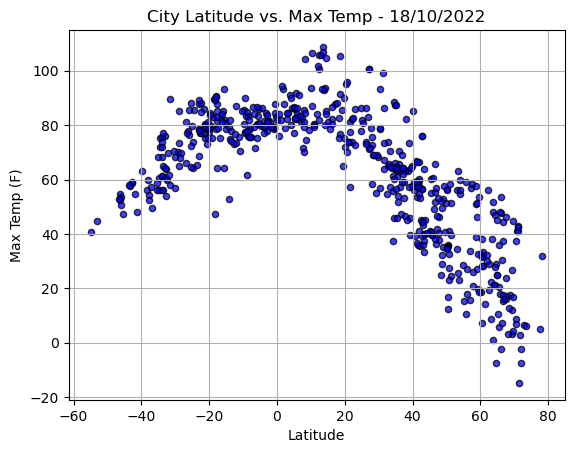

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temp - 18/10/2022')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

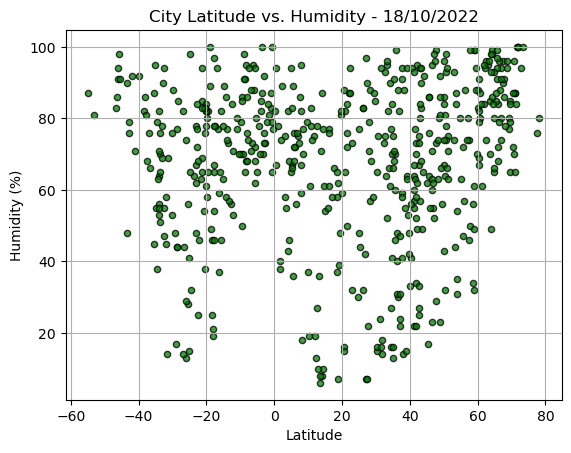

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity - 18/10/2022')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

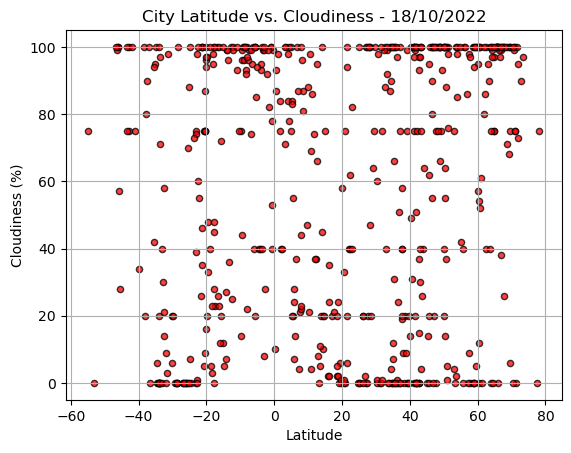

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness - 18/10/2022')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

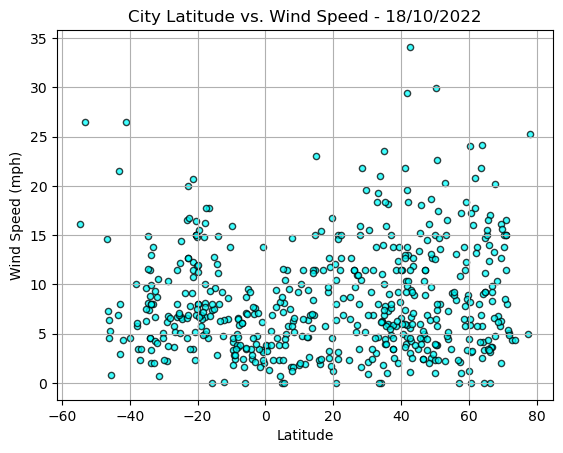

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', s=20, c='cyan', edgecolors='black', alpha=.75)
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed - 18/10/2022')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Haines Junction,60.7522,-137.5108,28.35,80,100,17.27,CA,2023-04-18 13:55:59
2,Glendive,47.1053,-104.7125,41.70,52,20,11.50,US,2023-04-18 13:56:00
3,Albany,42.6001,-73.9662,45.03,67,15,3.00,US,2023-04-18 13:55:09
4,Ejido,8.5514,-71.2375,74.66,77,87,5.12,VE,2023-04-18 13:56:00
5,Nanortalik,60.1432,-45.2371,32.74,88,95,1.19,GL,2023-04-18 13:54:23


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Busselton,-33.6500,115.3333,56.16,70,0,12.95,AU,2023-04-18 13:55:59
8,Punta Arenas,-53.1500,-70.9167,44.71,81,0,26.46,CL,2023-04-18 13:51:41
11,Plettenberg Bay,-34.0527,23.3716,68.11,64,0,4.59,ZA,2023-04-18 13:56:00
12,Isangel,-19.5500,169.2667,79.77,82,48,15.50,VU,2023-04-18 13:56:01
14,Bredasdorp,-34.5322,20.0403,75.25,38,0,8.16,ZA,2023-04-18 13:56:01


###  Temperature vs. Latitude Linear Regression Plot

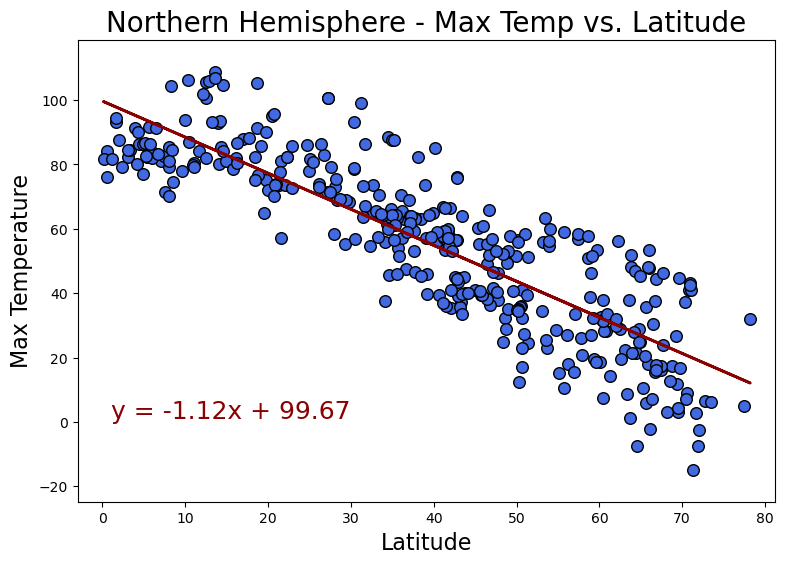

In [31]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Max Temp'])-10, max(city_data_df['Max Temp'])+10)

# Set the limits of the x axis:
plt.xlim(-3, max(city_data_df['Lat'])+3)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()

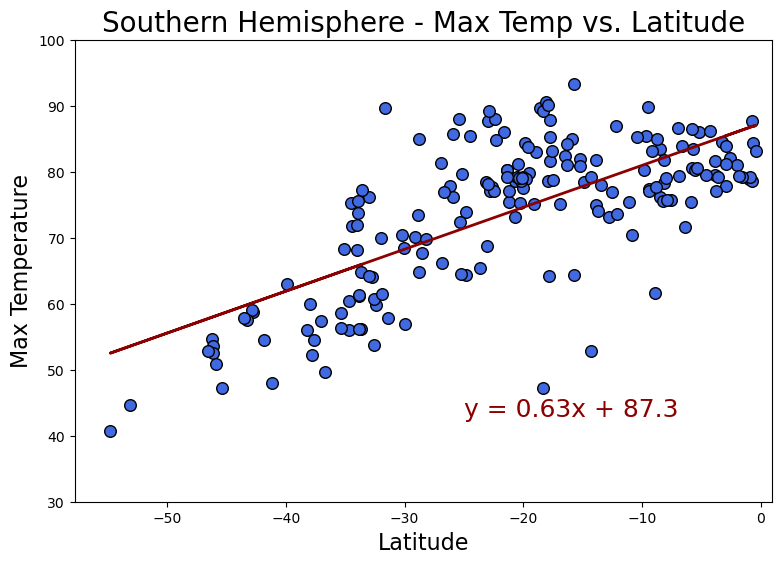

In [32]:
# Linear regression on Southern Hemisphere

plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(30,100)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-3, +1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

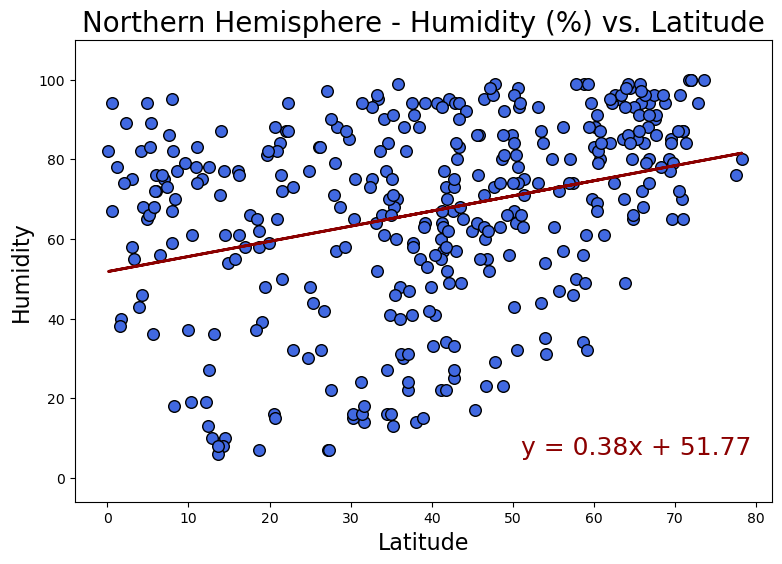

In [35]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()

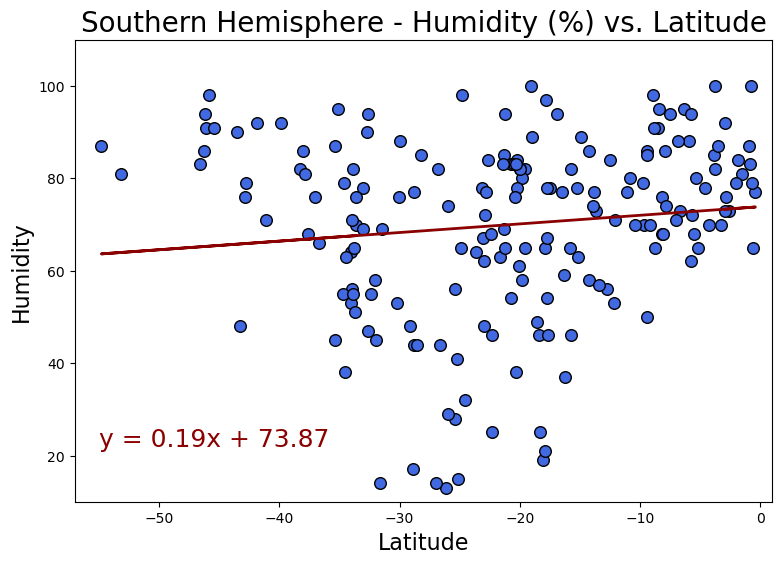

In [36]:
# Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(10, 110)

# Set the limits of the x axis:
plt.xlim(-57, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Humidity_South.png')

# Show plot:
plt.show()


**Discussion about the linear relationship:** 
There is almost no correlation between humidity level and city position moving north from equator.

There is almost no correlation between humidity level and city position moving south from equator.



### Cloudiness vs. Latitude Linear Regression Plot

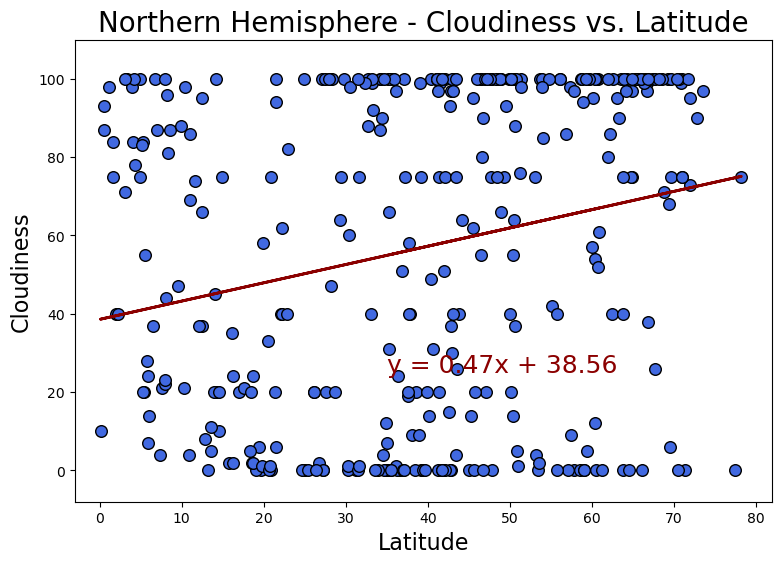

In [38]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-8, 110)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

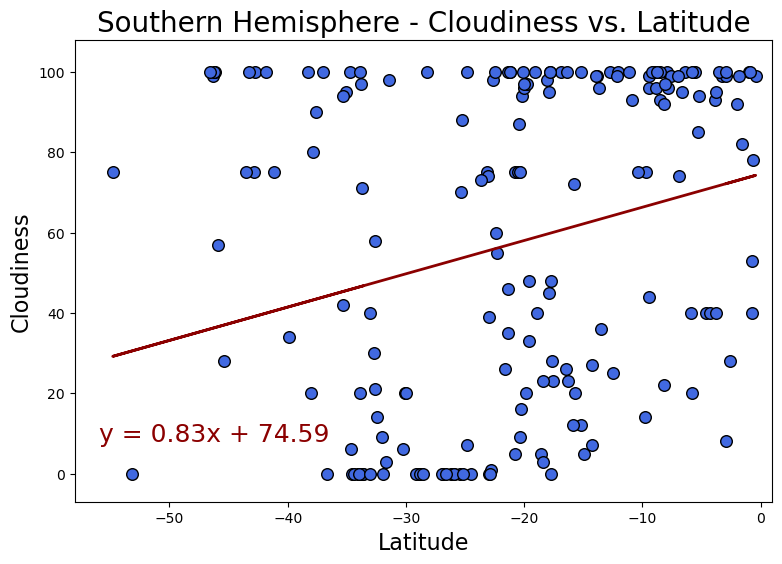

In [39]:
# Southern Hemisphere
# build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-7, 108)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Cloudiness_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** 
There is no correlation between the cloudiness level and a latitude on the Southern Hemisphere.
There is no correlation between the cloudiness level and a latitude on the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

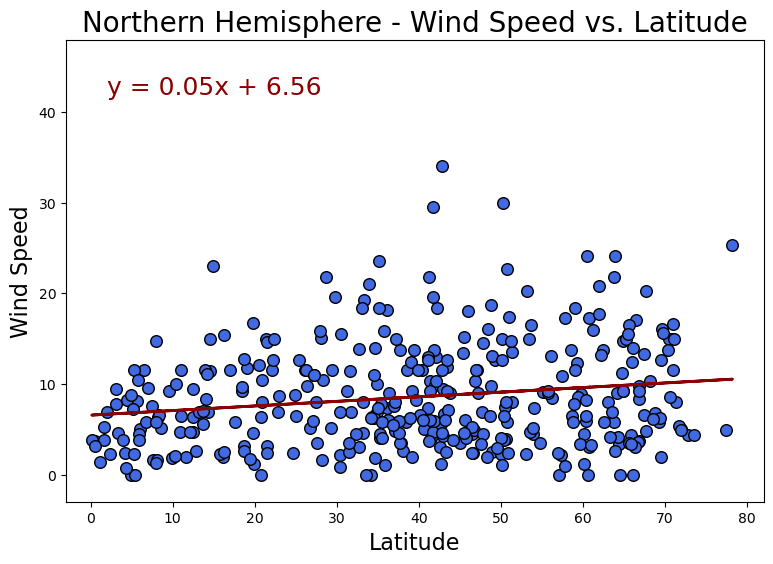

In [40]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-3, 48)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Wind_North.png')

# Show plot:
plt.show()

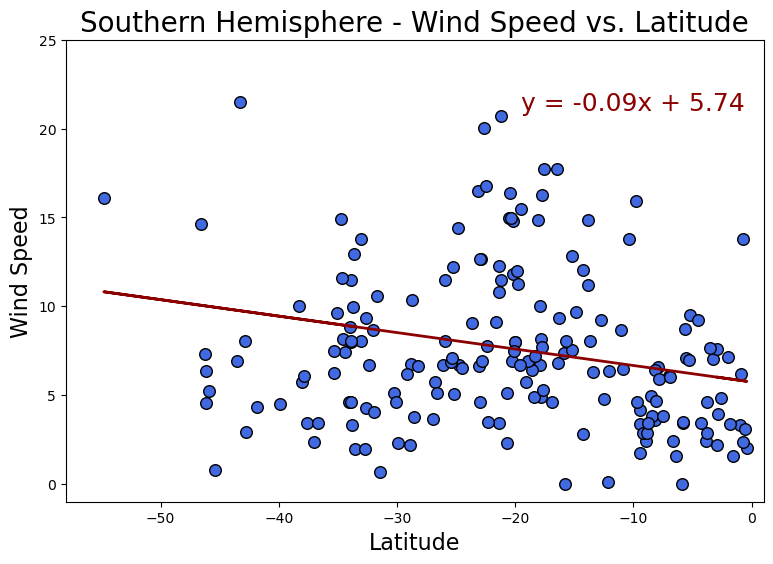

In [41]:
# Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-1, 25)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Wind_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** 
There is a very low negative correlation between a wind speed and a latitude on the Northern Hemisphere
There is a very low negative correlation between a wind speed and a latitude on the Southern Hemisphere